In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
path = 'results_10.1'

### Es 10.1
In questa prima parte dell'esercitazione abbiamo adattato l'algoritmo genetico scritto in precedenza con lo scopo di risolvere il probelema di minimizzazione dell'esercitazione 09 (Traveling Salesman Problem (TSP)) mediante l'ultizzo della tecnica chiamata Simulated Annealing. 
L'algoritmo funziona in questo modo: si fissa la temperatura fittizia del sistema; si compiono un numero $N_{passi}$ di passi Metropolis, accettando le sequenza proposte in base al valore delle lunghezza $L$ relativa alle due sequenze; si abbassa la temperatura e si compiono altri $N_{passi}$ con la nuova temperatura. Più si abbassa la temperatura, più è alta la probabilità che l'algoritmo metropolis campioni sequenze con bassa lunghezza di percorrenza, a temperatura quasi nulla si approssima quindi lo stato con lunghezza minima.
Per quanto riguarda la tecnica del Metropolis, abbiamo uilizzato le mutazioni scritte nell'eserictazione 09 per proporre la nuova sequenza, la mutazione che intercorre viene scelta casualmente. La probabilità di transizione è infine la seguente: 
$$
A(x'|x)=min(1, e^{-\beta (L(x')-L(x))})
$$
dove $x$ è la vecchia sequenza e $x'$ la sequanza proposta.

Come nella esercitazione precedente abbiamo considerato $30$ città poste in due configurazioni: su una circonferenza e interne a un quadrato. Di seguito riportiamo tutti i parametri delle simulazioni

1. numero di città $=30$

2. temperatura iniziale $=1.5$

3. numero di passi montecarlo per ogni valore di temperatura $=100$

4. $\Delta T$ $=0.001$

5. raggio circonferenza $=2$

6. lato quadrato $=4$

Mostriamo di seguito il grafico del valore della lunghezza di percorrenza delle sequenze generate e il percorso finale.

In [5]:
db_L_c=pd.read_csv(path + '/circle', sep=' ', header=None)
db_L_s=pd.read_csv(path + '/square', sep=' ', header=None)
db_coordinates_c=pd.read_csv(path + '/final_configurationC', sep=' ', header=None)
db_coordinates_s=pd.read_csv(path + '/final_configurationS', sep=' ', header=None)

Ngenerazioni=1000*150
generazioni = []
for i in range(0, Ngenerazioni):
    generazioni.append(i)

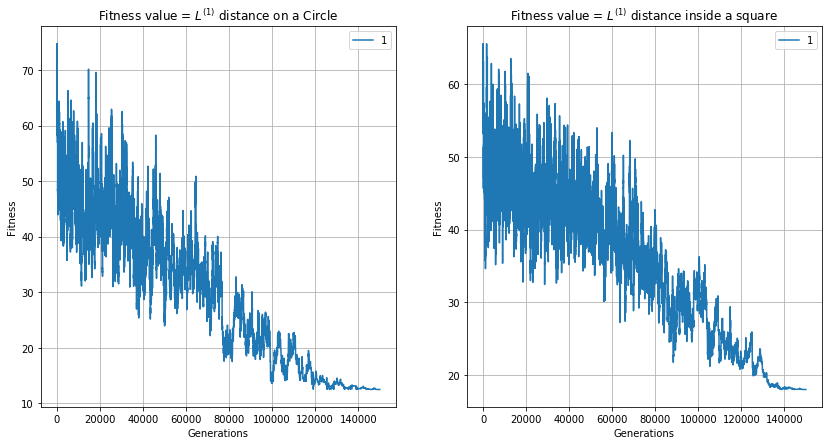

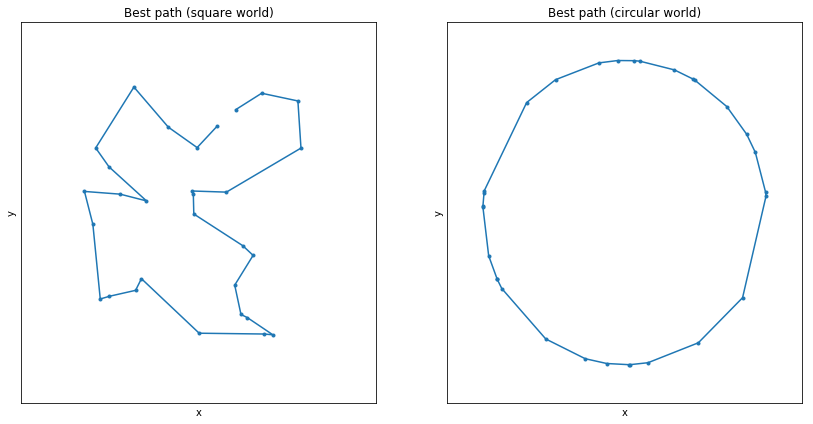

In [6]:
    #cerchio
    plt.figure(1, figsize = (14, 7))
    plt.subplot(1,2,1)
    plt.title("Fitness value = $L^{(1)}$ distance on a Circle")
    plt.plot(generazioni, db_L_c.iloc[:,1])
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.grid(True)
    plt.legend()

    #quadrato
    plt.subplot(1,2,2)
    plt.title("Fitness value = $L^{(1)}$ distance inside a square")
    plt.plot(generazioni, db_L_s.iloc[:,1])
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.grid(True)
    plt.legend()
    
    #"# Plot best path \n",
    plt.figure(3, figsize = (14, 7))
   # "# Square world\n",
    plt.subplot(1, 2, 1)
    plt.title("Best path (square world)")
    plt.plot(db_coordinates_s.iloc[:,0],db_coordinates_s.iloc[:,1],  marker=".")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.xticks([])
    plt.yticks([])
   # "# Circle world\n",
    plt.subplot(1, 2, 2)
    plt.title("Best path (circular world)")
    plt.plot(db_coordinates_c.iloc[:,0], db_coordinates_c.iloc[:,1],  marker=".")
    plt.xlabel('x')
    plt.ylabel('y')
    #"#plt.axis('equal')\n",
    plt.xlim((-2.5, 2.5))
    plt.ylim((-2.5, 2.5))
    plt.xticks([])
    plt.yticks([])
    
    plt.show()

Il valore di lunghezza trovato nel caso delle città distribuite su una circonferenza è di $12.4917$ nettamente meglio del risultato ottenuto con l'algoritmo genetico. Analogamente nel caso delle città poste all'interno di un quadrato la lunghezza minima trovata è pari a $17.9696$ risutato migliore di quello ottenuto con l'algoritmo genetico.

### Esercizio 10.2
Nella seconda parte di questa esercitazione abbiamo parallelizzato l'algoritmo di simulated annealing appena costruito. Abbiamo usato la libreria MPI per far calcolare il percorso minimo tra le città (nelle stesse posizioni dell'esercizio 10.1) a due nodi distinti e scegliendo alla fine il risultato migliore.  

I parametri utilizzati in questa parte sono:
1. temperatura iniziale $=1.5$

2. step totali di temperatura $=150$

3. numero di passi montecarlo per ogni valore di temperatura $=100$

4. $\Delta T$ $=0.01$

Mostriamo di seguito i grafici della lunghezza del percorso per i diversi core e il percorso minimo.

In [3]:
path = 'results_10.2'

In [4]:
MPI_L_c0=pd.read_csv(path + '/lunghezza_C_0', sep=' ', header=None)
MPI_L_c1=pd.read_csv(path + '/lunghezza_C_1', sep=' ', header=None)
MPI_L_s0=pd.read_csv(path + '/lunghezza_Q_0', sep=' ', header=None)
MPI_L_s1=pd.read_csv(path + '/lunghezza_Q_1', sep=' ', header=None)
MPI_bestpath_c=pd.read_csv(path + '/SequenzaFinale_C0', sep=' ', header=None)
MPI_bestpath_s=pd.read_csv(path + '/SequenzaFinale_Q1', sep=' ', header=None)

In [5]:
del MPI_L_c0[1], MPI_L_c0[2], MPI_L_c0[3], MPI_L_c1[1], MPI_L_c1[2], MPI_L_c1[3], MPI_L_s0[1], MPI_L_s0[2], MPI_L_s0[3], MPI_L_s1[1], MPI_L_s1[2], MPI_L_s1[3]

In [6]:
Ngenerazioni=100*150
generazioni = []
for i in range(0, Ngenerazioni):
    generazioni.append(i)

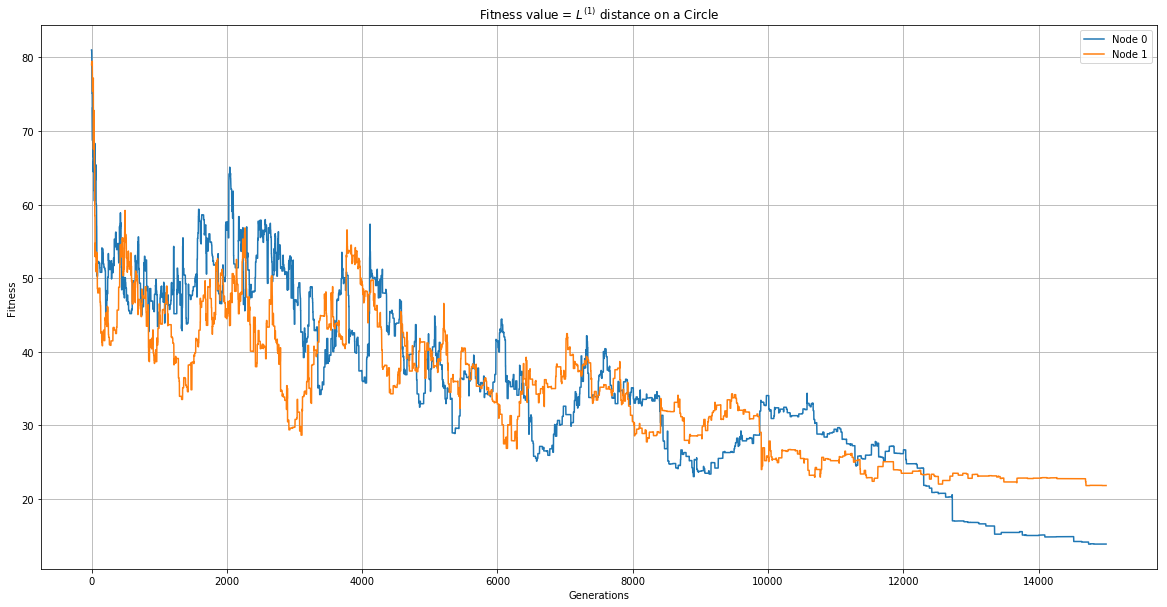

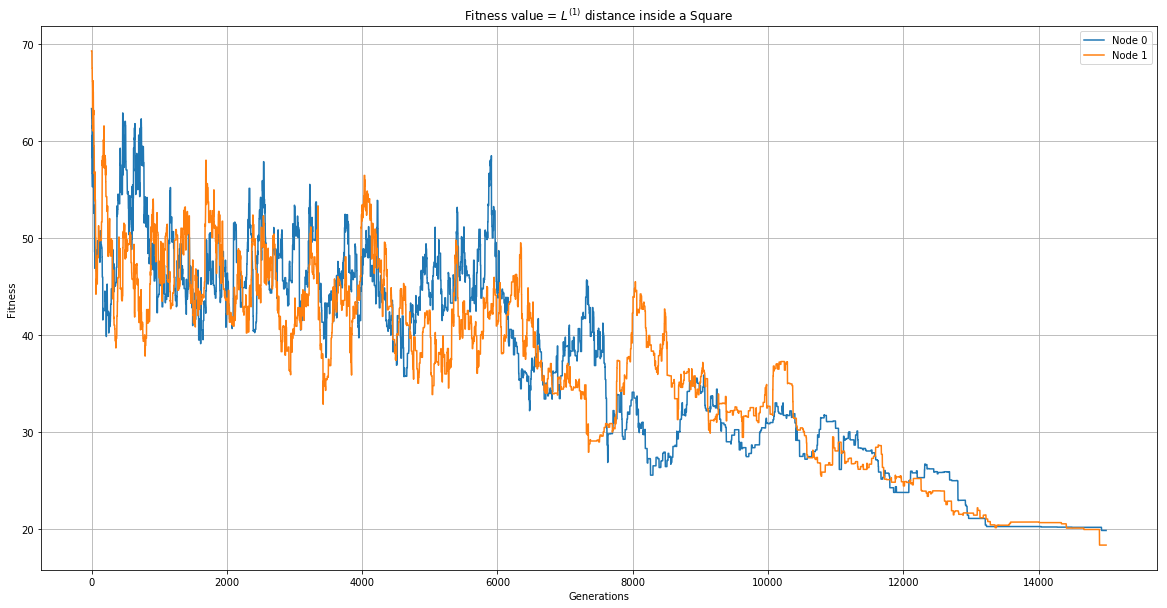

In [7]:
#cerchio
plt.figure(1, figsize = (20, 10))
#plt.subplot(1,2,1)
plt.title("Fitness value = $L^{(1)}$ distance on a Circle")
plt.plot(generazioni, MPI_L_c0.iloc[:,1],label="Node 0")
plt.plot(generazioni, MPI_L_c1.iloc[:,1],label="Node 1")
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.grid(True)
plt.legend()
plt.show()

#quadrato
plt.figure(2, figsize = (20, 10))


#plt.subplot(1,2,2)
plt.title("Fitness value = $L^{(1)}$ distance inside a Square")
plt.plot(generazioni, MPI_L_s0.iloc[:,1],label="Node 0")
plt.plot(generazioni, MPI_L_s1.iloc[:,1],label="Node 1")
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.grid(True)
plt.legend()

    
plt.show()

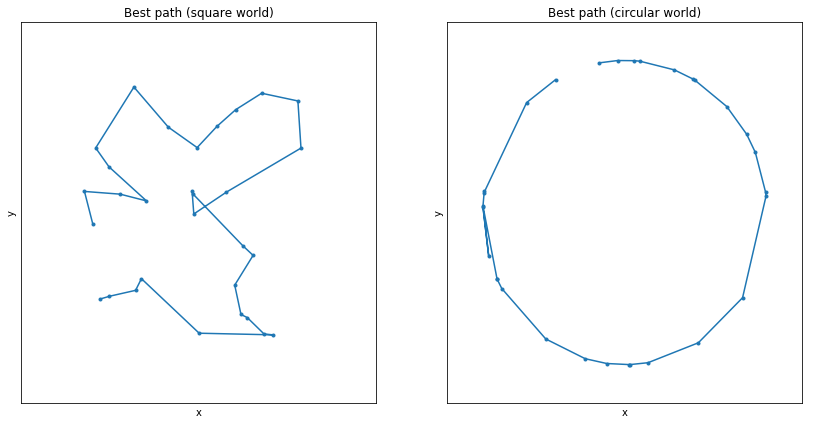

In [11]:
plt.figure(3, figsize = (14, 7))
   # "# Square world\n",
plt.subplot(1, 2, 1)
plt.title("Best path (square world)")
plt.plot(MPI_bestpath_s.iloc[:,0],MPI_bestpath_s.iloc[:,1],  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-3, 3))
plt.ylim((-3, 3))
plt.xticks([])
plt.yticks([])
# "# Circle world\n",
plt.subplot(1, 2, 2)
plt.title("Best path (circular world)")
plt.plot(MPI_bestpath_c.iloc[:,0], MPI_bestpath_c.iloc[:,1],  marker=".")
plt.xlabel('x')
plt.ylabel('y')
#"#plt.axis('equal')\n",
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))
plt.xticks([])
plt.yticks([])
    
plt.show()